In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC  # Import SVC for Support Vector Machine
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [4]:
df = pd.read_csv('/kaggle/input/combined-data-csv/Combined Data.csv')
df.head()
df.info()
df.drop(columns=['Unnamed: 0'], inplace=True)
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


statement    362
status         0
dtype: int64

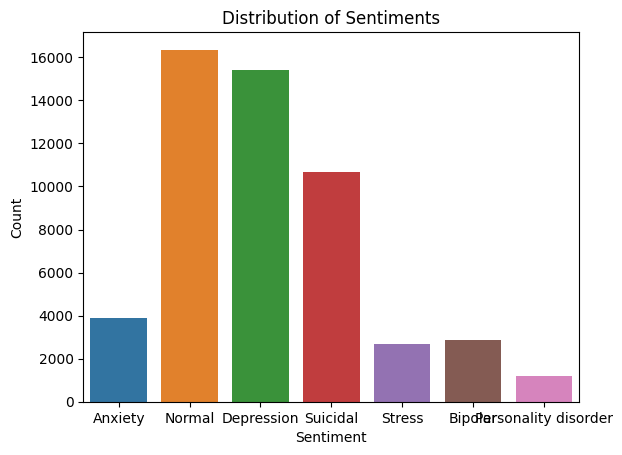

In [5]:
sns.countplot(x='status', data=df)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [6]:
df.dropna(subset=['statement'], inplace=True)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df['statement'], df['status'], test_size=0.2, random_state=42)

In [8]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [9]:
model = SVC()  # Initialize the SVM classifier
model.fit(X_train_tfidf, y_train)

SVC()

In [10]:
y_pred = model.predict(X_test_tfidf)

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.79


In [12]:
precision_recall_f1 = precision_recall_fscore_support(y_test, y_pred, average=None, labels=np.unique(y_test))
precision = precision_recall_f1[0]
recall = precision_recall_f1[1]
f1 = precision_recall_f1[2]

for i, label in enumerate(np.unique(y_test)):
    print(f'Class: {label}')
    print(f'Precision: {precision[i]:.2f}')
    print(f'Recall: {recall[i]:.2f}')
    print(f'F1-score: {f1[i]:.2f}')
    print('------------------------')


Class: Anxiety
Precision: 0.85
Recall: 0.79
F1-score: 0.82
------------------------
Class: Bipolar
Precision: 0.91
Recall: 0.73
F1-score: 0.81
------------------------
Class: Depression
Precision: 0.69
Recall: 0.76
F1-score: 0.73
------------------------
Class: Normal
Precision: 0.88
Recall: 0.96
F1-score: 0.92
------------------------
Class: Personality disorder
Precision: 0.95
Recall: 0.43
F1-score: 0.59
------------------------
Class: Stress
Precision: 0.76
Recall: 0.54
F1-score: 0.63
------------------------
Class: Suicidal
Precision: 0.73
Recall: 0.68
F1-score: 0.70
------------------------


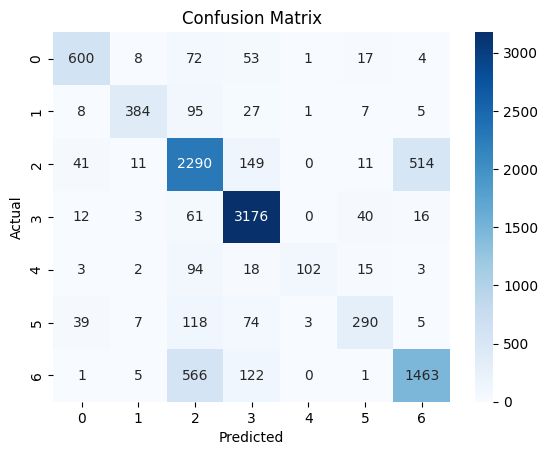

                      precision    recall  f1-score   support

             Anxiety       0.85      0.79      0.82       755
             Bipolar       0.91      0.73      0.81       527
          Depression       0.69      0.76      0.73      3016
              Normal       0.88      0.96      0.92      3308
Personality disorder       0.95      0.43      0.59       237
              Stress       0.76      0.54      0.63       536
            Suicidal       0.73      0.68      0.70      2158

            accuracy                           0.79     10537
           macro avg       0.83      0.70      0.74     10537
        weighted avg       0.79      0.79      0.78     10537



In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display classification report
print(classification_report(y_test, y_pred))

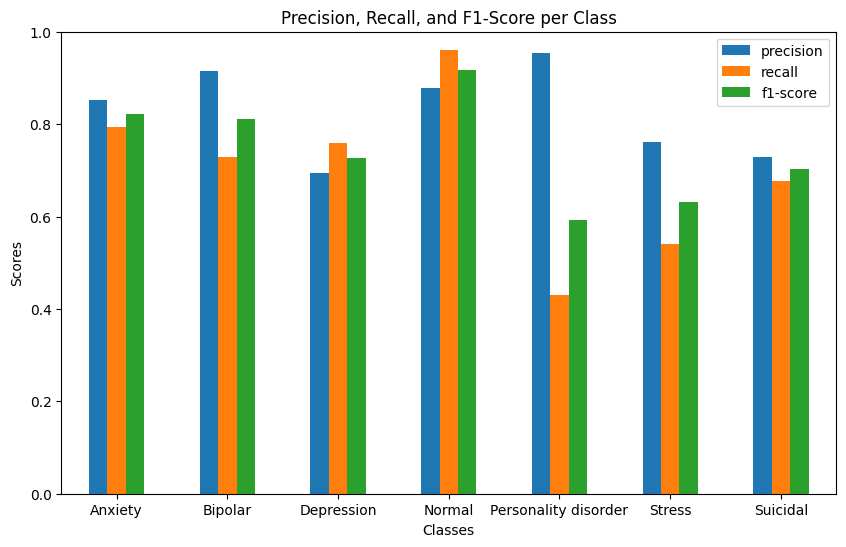

In [14]:
class_report = classification_report(y_test, y_pred, output_dict=True)

# Convert classification report to DataFrame
metrics_df = pd.DataFrame(class_report).transpose().iloc[:-3, :3]  # Exclude 'support' and 'avg/total' rows

# Plot metrics
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Precision, Recall, and F1-Score per Class')
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.show()